In [2]:
# Import necessary libraries for data handling and machine learning

import pandas as pd  # For loading and manipulating dataset
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For enhanced data visualization

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Convert text data into numerical features
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning model (Naive Bayes for text classification)
from sklearn.naive_bayes import MultinomialNB

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load the dataset (latin1 encoding is required for this dataset)
df = pd.read_csv("spam.csv", encoding="latin1")

# Select only useful columns
# v1 = label (spam/ham)
# v2 = message text
df = df[['v1', 'v2']]

# Rename columns for better readability
df.columns = ['label', 'text']

# Display first few rows
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Convert text labels into numeric values
# ham -> 0
# spam -> 1

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# X contains input data (text messages)
X = df['text']

# y contains output labels (spam or ham)
y = df['label']


# Split dataset:
# 80% for training
# 20% for testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [6]:
# Initialize TF-IDF Vectorizer
# It converts text into numeric feature vectors

vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Only transform test data (do NOT fit again)
X_test_tfidf = vectorizer.transform(X_test)


In [7]:
# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model using training data
model.fit(X_train_tfidf, y_train)

# Predict labels for test dataset
y_pred = model.predict(X_test_tfidf)


In [8]:
# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report (precision, recall, F1-score)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9668161434977578

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



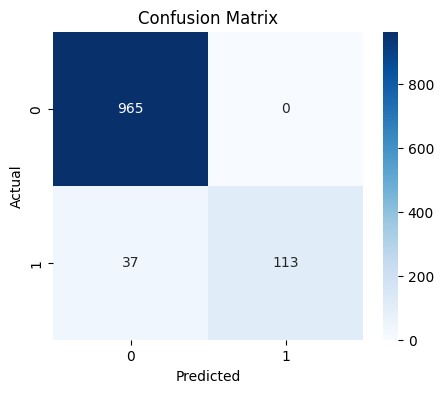

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
# Function to classify new messages
def predict_message(message):
     # Convert message to TF-IDF format
    msg_vector = vectorizer.transform([message])

    # Predict using trained model
    prediction = model.predict(msg_vector)

    # Return readable result
    return "Spam" if prediction[0] == 1 else "Ham"

print("1:", predict_message("Congratulations! You won a free lottery ticket."))
print("2:", predict_message("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005."))


1: Ham
2: Spam
